In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 2s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

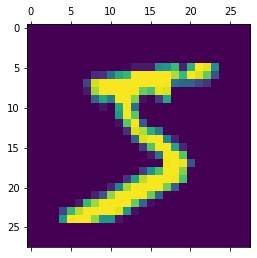

In [9]:
plt.matshow(X_train[0])

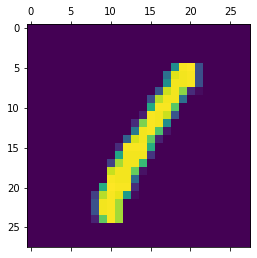

In [10]:
plt.matshow(X_train[3])

In [11]:
y_train[3]

1

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [14]:
X_train.shape
#3 dimensions: 1- length of dataset,shape of each data

(60000, 28, 28)

In [21]:
#converting 2 d array to 1-d
#also perform scaling

X_train = X_train/255
X_test = X_test/255

X_train_flat = X_train.reshape(len(X_train),28*28)
X_train_flat.shape


(60000, 784)

In [22]:
X_test_flat = X_test.reshape(len(X_test),28*28)
X_test_flat.shape

(10000, 784)

## Creating Simple Neural Network with 2 layers(input and output)

In [23]:
#Sequential means having a stack of layer in neural network
#since it is stack it will accept every layer as one element
#Dense means all neurons in one layer are connected with every other neuron in other layer
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

#Optimiser helps in efficient training during backward propagation

#sparse means basically we have an exact no in output and categorical means we have our output classified into categories

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
                  
)

#epochs are no of times our training will be done
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4700 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2838 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2732 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9259


In [24]:
#checking accuracy on test dataset

model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2679 - accuracy: 0.9256


[0.2678636312484741, 0.925599992275238]

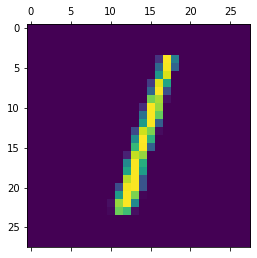

In [30]:
plt.matshow(X_test[2])

In [26]:
y_predicted = model.predict(X_test_flat)

In [31]:
y_predicted[2]
#predicting for all digits from 0 to 9

array([4.1761994e-04, 9.9246436e-01, 7.2649747e-01, 3.3483994e-01,
       2.9025346e-02, 1.1092225e-01, 1.4759329e-01, 1.3773939e-01,
       4.4635823e-01, 4.8310131e-02], dtype=float32)

In [32]:
#to get maximum value of this array or its index
np.argmax(y_predicted[2])

1

In [33]:
#y_predicted is floating no array we have to convert them to single whole no to make any comparison

In [34]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [35]:
y_predicted_labels[ : 5]

[7, 2, 1, 0, 4]

In [36]:
y_test[ : 5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [38]:
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)

Text(69.0, 0.5, 'Truth')

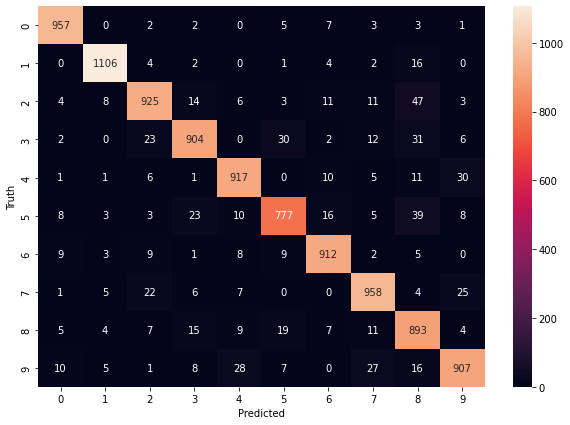

In [40]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True , fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Now adding inner neural layers

In [41]:
model = keras.Sequential([
    #adding one more layers with 100 neurons(Trial and error)
    #Increase will layers will increase both time and accuracy
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
                  
)

#epochs are no of times our training will be done
model.fit(X_train_flat,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2780 - accuracy: 0.9205
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1276 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0877 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0672 - accuracy: 0.9794
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0536 - accuracy: 0.9835


In [42]:
model.evaluate(X_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0767 - accuracy: 0.9766


[0.07674763351678848, 0.9765999913215637]

Text(69.0, 0.5, 'Truth')

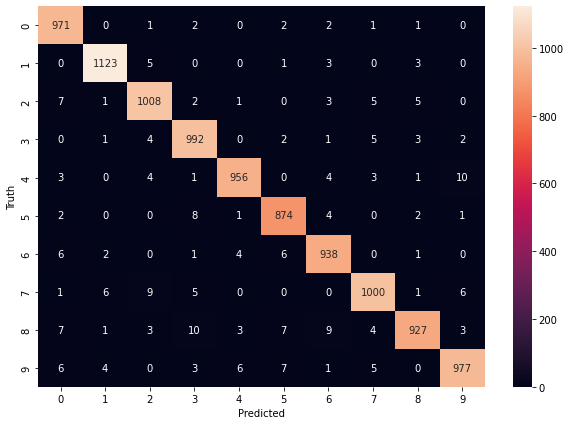

In [43]:
y_predicted = model.predict(X_test_flat)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions= y_predicted_labels)


plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True , fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Without using X_test_flat

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
                  
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2718 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1221 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0845 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0648 - accuracy: 0.9802
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0525 - accuracy: 0.9836
